# **Capitulo 2 – Training Models**

# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Como hicimos en Notebook anteriores, vamos a definir los tamaños de fuente por defecto para que las figuras queden más bonitas:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Y vamos a crear la carpeta `images/training_linear_models` (si no existe ya), y definir la función `save_fig()` que se utiliza a través de este cuaderno para guardar las figuras en alta resolución para el libro:

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Logistic Regression

Como ya se comentó, algunos algoritmos de regresión pueden utilizarse para la clasificación (y viceversa). La regresión logística (también llamada regresión logit) suele utilizarse para estimar la probabilidad de que un caso pertenezca a una clase determinada (por ejemplo, ¿cuál es la probabilidad de que este correo electrónico sea spam?). Si la probabilidad estimada es superior a un umbral determinado (normalmente el 50%), el modelo predice que la instancia pertenece a esa clase (denominada clase positiva, etiquetada como "1") y, en caso contrario, predice que no (es decir, que pertenece a la clase negativa, etiquetada como "0"). Se trata, por tanto, de un clasificador binario.

## Estimación de probabilidades

Entonces, ¿cómo funciona la regresión logística? Al igual que un modelo de regresión lineal, un modelo de regresión logística calcula una suma ponderada de las características de entrada (más un término de sesgo), pero en lugar de emitir el resultado directamente como lo hace el modelo de regresión lineal, emite la logística de este resultado.

Probabilidad estimada del modelo de regresión logística (forma vectorizada)

$$ p = h_{\theta}(x) = \sigma(\theta^{\top} x) $$
La logística —notada como $ \sigma(\cdot) $— es una función sigmoide (es decir, con forma de S) que emite un número entre 0 y 1.

Función logística
$$ \sigma(t) = \frac{1}{1 + \exp(-t)} $$


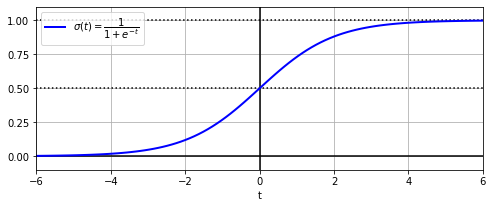

In [3]:

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
# save_fig("logistic_function_plot")
plt.show()

Una vez que el modelo de regresión logística ha estimado la probabilidad $ p = h_{\theta}(x) $ de que una instancia $ x $ pertenezca a la clase positiva, puede hacer su predicción $ \hat{y} $ fácilmente (ver Ecuación 4-15).

Ecuación 4-15. Predicción del modelo de regresión logística utilizando un umbral de probabilidad del 50%
$$
\hat{y} = \left\{
\begin{array}{ll}
0 & \text{si } p < 0.5 \\
1 & \text{si } p \geq 0.5
\end{array}
\right.
$$
Observa que $ \sigma(t) < 0.5 $ cuando $ t < 0 $, y $ \sigma(t) \geq 0.5 $ cuando $ t \geq 0 $, por lo que un modelo de regresión logística que utiliza el umbral predeterminado de probabilidad del 50% predice 1 si $ \theta^{\top} x $ es positivo y 0 si es negativo.



La t Score suele denominarse logit. El nombre proviene del hecho de que la función logit, definida como $logit(p) = log(p / (1 - p))$, es la inversa de la función logística. De hecho, si se calcula el logit de la probabilidad estimada p, el resultado es t. El logit también se denomina log-odds, ya que es el logaritmo de la relación entre la probabilidad estimada para la clase positiva y la probabilidad estimada para la clase negativa.

## Training and Cost Function

Ahora ya sabe cómo un modelo de regresión logística estima probabilidades y hace predicciones. Pero, ¿cómo se entrena? El objetivo del entrenamiento es establecer el vector de parámetros $θ$ de forma que el modelo estime probabilidades altas para los casos positivos $(y = 1)$ y probabilidades bajas para los casos negativos $(y = 0)$. Esta idea se recoge en la función de coste que se muestra en la ecuación.

Función de coste de una única instancia de entrenamiento

$$c(\theta) = \left\{
\begin{array}{ll}
-\log(p) & \text{si } y = 1 \\
-\log(1 - p) & \text{si } y = 0
\end{array}
\right.$$

Esta función de coste tiene sentido porque -log(t) crece mucho cuando t se acerca a 0, por lo que el coste será grande si el modelo estima una probabilidad cercana a 0 para un caso positivo, y también será grande si el modelo estima una probabilidad cercana a 1 para un caso negativo. Por otro lado, -log(t) se aproxima a 0 cuando t se aproxima a 1, por lo que el coste se aproximará a 0 si la probabilidad estimada se aproxima a 0 para un caso negativo o se aproxima a 1 para un caso positivo, que es precisamente lo que queremos.

La función de coste sobre todo el conjunto de entrenamiento es el coste medio sobre todas las instancias de entrenamiento. Puede escribirse en una única expresión denominada pérdida logarítmica, que se muestra en la ecuación.

Función de coste de la regresión logística (pérdida logarítmica)
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^i \log(\hat{p}^i) + (1 - y^i) \log(1 - \hat{p}^i) \right]
$$


La pérdida logarítmica no se sacó de un sombrero. Se puede demostrar matemáticamente (utilizando la inferencia bayesiana) que la minimización de esta pérdida dará como resultado el modelo con la máxima probabilidad de ser óptimo, suponiendo que las instancias siguen una distribución gaussiana en torno a la media de su clase. Cuando se utiliza la pérdida logarítmica, ésta es la suposición implícita que se hace. Cuanto más errónea sea esta suposición, más sesgado será el modelo. Del mismo modo, cuando utilizamos el MSE para entrenar modelos de regresión lineal, estábamos asumiendo implícitamente que los datos eran puramente lineales, más algo de ruido gaussiano. Por tanto, si los datos no son lineales (por ejemplo, si son cuadráticos) o si el ruido no es gaussiano (por ejemplo, si los valores atípicos no son exponencialmente raros), el modelo estará sesgado.


La mala noticia es que no existe una ecuación en forma cerrada conocida para calcular el valor de $\theta$ que minimiza esta función de costo (no hay un equivalente a la ecuación normal). Pero la buena noticia es que esta función de costo es convexa, por lo que el descenso de gradiente (o cualquier otro algoritmo de optimización) garantiza encontrar el mínimo global (si la tasa de aprendizaje no es demasiado grande y esperas lo suficiente). Las derivadas parciales de la función de costo con respecto al parámetro del modelo $j$-ésimo $\theta_j$ se dan en la siguiente ecuación.

Derivadas parciales de la función de costo de regresión logística
$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma(\theta^{\top} x_i) - y_i \right) x_{ji} $$

Para cada instancia, calcula el error de predicción y lo multiplica por el valor de la característica $j$-ésima, y luego calcula el promedio sobre todas las instancias de entrenamiento. Una vez que tengas el vector de gradiente que contiene todas las derivadas parciales, puedes usarlo en el algoritmo de descenso de gradiente por lotes.

Eso es todo: ahora sabes cómo entrenar un modelo de regresión logística. Para el descenso de gradiente estocástico tomarías una instancia a la vez, y para el descenso de gradiente por mini-lotes usarías un mini-lote a la vez.


## Límites de la decisión

Podemos utilizar el conjunto de datos del iris para ilustrar la regresión logística. Se trata de un famoso conjunto de datos que contiene la longitud y anchura de los sépalos y pétalos de 150 flores de iris de tres
diferentes tipos: Iris setosa, Iris versicolor e Iris virginica.

Intentemos construir un clasificador para detectar el tipo de Iris virginica basándonos únicamente en la característica de anchura de los pétalos. El primer paso es cargar los datos y echar un vistazo rápido:

In [4]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
iris.target.head(3)  # ten en cuenta que las instancias no se mezclan

0    0
1    0
2    0
Name: target, dtype: int32

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

A continuación, dividiremos los datos y entrenaremos un modelo de regresión logística en el conjunto de entrenamiento:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Veamos las probabilidades estimadas del modelo para flores con anchuras de pétalo que varían de 0 cm a 3 cm

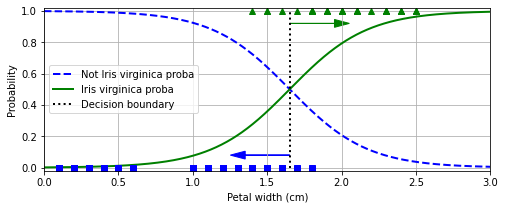

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # remodelar para obtener un vector columna
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3)) 
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
# save_fig("logistic_regression_plot")

plt.show()

La anchura de los pétalos de las flores de Iris virginica (representadas como triángulos) oscila entre 1,4 cm y 2,5 cm, mientras que las otras flores de iris (representadas por cuadrados) tienen generalmente una anchura de pétalo menor, que oscila entre 0,1 cm y 1,8 cm. Obsérvese que hay cierto solapamiento. Por encima de unos 2 cm, el clasificador está muy seguro de que la flor es un Iris virginica (emite una probabilidad alta para esa clase), mientras que por debajo de 1 cm está muy seguro de que no es un Iris virginica (probabilidad alta para la clase "No Iris virginica"). Entre estos extremos, el clasificador no está seguro. Sin embargo, si se le pide que prediga la clase (utilizando el método predict() en lugar del método predict_proba()), devolverá la clase que sea más probable. Por lo tanto, existe un límite de decisión en torno a 1,6 cm en el que ambas probabilidades son iguales al 50%: si la anchura del pétalo es superior a 1,6 cm, el clasificador predecirá que la flor es una Iris virginica y, en caso contrario, predecirá que no lo es (aunque no esté muy seguro):

In [12]:
decision_boundary

1.6516516516516517

In [13]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

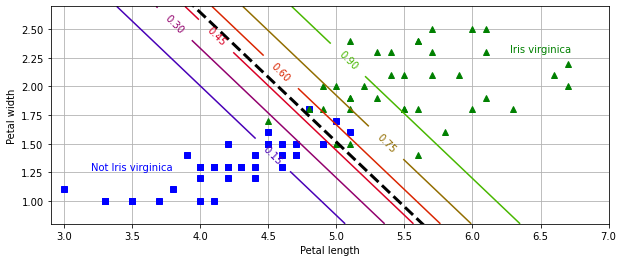

In [15]:

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# para el gráfico de contornos
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # una instancia por punto de la figura
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# para el límite de decisión
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
# save_fig("logistic_regression_contour_plot")
plt.show()

La figura muestra el mismo conjunto de datos, pero esta vez con dos características: la anchura y la longitud de los pétalos. Una vez entrenado, el clasificador de regresión logística puede, basándose en estas dos características, estimar la probabilidad de que una nueva flor sea un Iris virginica. La línea discontinua representa los puntos en los que el modelo estima una probabilidad del 50%: es el límite de decisión del modelo. Cada línea paralela representa los puntos en los que el modelo da una probabilidad específica, del 15% (abajo a la izquierda) al 90% (arriba a la derecha). Según el modelo, todas las flores situadas más allá de la línea superior derecha tienen más de un 90% de probabilidades de ser Iris virginica.

El hiperparámetro que controla la fuerza de regularización de un modelo LogisticRegression de Scikit-Learn no es alfa (como en otros modelos lineales), sino su inverso: C. Cuanto mayor sea el valor de C, menor será la regularización del modelo.

Al igual que los demás modelos lineales, los modelos de regresión logística pueden regularizarse utilizando ℓ1 o ℓ2 penalizaciones. Scikit-Learn añade una penalización ℓ2 por defecto.

## Softmax Regression

El modelo de regresión logística puede generalizarse para admitir varias clases directamente, sin tener que entrenar y combinar varios clasificadores binarios. Esto se denomina regresión softmax o regresión logística multinomial.

La idea es sencilla: dada una instancia x, el modelo de regresión softmax calcula primero una puntuación $s_k(x)$ para cada clase k y, a continuación, estima la probabilidad de cada clase aplicando la función softmax (también llamada exponencial normalizada) a las puntuaciones. La ecuación para calcular $s_k(x)$ debería resultarle familiar, ya que es igual que la ecuación para la predicción de regresión lineal.

Puntuación Softmax para la clase k
$$s_k(x) = (θ^k )^⊺ x$$

Tenga en cuenta que cada clase tiene su propio vector de parámetros $θ^(k)$. Todos estos vectores suelen almacenarse como filas de una matriz de parámetros $Θ$.

Una vez calculada la puntuación de cada clase para la instancia x, puede estimar la probabilidad $\hat{p}k$ de que la instancia pertenezca a la clase k ejecutando las puntuaciones a través de la función softmax. La función calcula la exponencial de cada puntuación y luego las normaliza (dividiendo por la suma de todas las exponenciales). Las puntuaciones suelen denominarse logits o log-odds (aunque en realidad son log-odds sin normalizar).

Función Softmax
$$\hat{p}k = σ(s)x)_k =\frac{exp(s_k(x))}{\sum_{j=1}^{k} exp (s_j(x))}$$

En esta ecuación
- K es el número de clases.
- s(x) es un vector que contiene las puntuaciones de cada clase para la instancia x.
- $σ(s(x))_k$ es la probabilidad estimada de que la instancia x pertenezca a la clase k, dadas
las puntuaciones de cada clase para esa instancia.


El clasificador de regresión softmax predice sólo una clase a la vez (es decir, es multiclase, no multisalida), por lo que sólo debe utilizarse con clases mutuamente excluyentes, como diferentes especies de plantas. No se puede utilizar para reconocer varias personas en una imagen.

Ahora que ya sabe cómo el modelo estima probabilidades y hace predicciones, echemos un vistazo al entrenamiento. El objetivo es tener un modelo que estime una alta probabilidad para la clase objetivo (y consecuentemente una baja probabilidad para las otras clases). Minimizar la función de coste llamada Cross Entropy, debería conducir a este objetivo porque penaliza al modelo cuando estima una probabilidad baja para una clase objetivo. La entropía cruzada se utiliza con frecuencia para medir lo bien que un conjunto de probabilidades de clase estimadas coincide con las clases objetivo.

Función de coste de Cross Entropy
$$J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)})$$


En esta ecuación, $y_k^i$ es la probabilidad objetivo de que la i-nesima instancia pertenezca a la clase k. En general, es igual a 1 o a 0, dependiendo de si la instancia pertenece a la clase o no.

Observe que cuando sólo hay dos clases (K = 2), esta función de coste es equivalente a la función de coste de regresión logística.


## Cross Entropy
Cross entropy tiene su origen en la teoría de la información de Claude Shannon. Supongamos que queremos transmitir información sobre el tiempo que hará cada día. Si hay ocho opciones (soleado, lluvioso, etc.), podría codificar cada opción utilizando 3 bits, porque $2^3 = 8$. Sin embargo, si cree que hará sol casi todos los días, sería mucho más eficiente codificar "soleado" en un solo bit (0) y las otras siete opciones en cuatro bits (empezando por un 1). La Cross Entropy mide el número medio de bits que realmente envías por opción. Si tu suposición sobre el tiempo es perfecta, la Cross Entropy será igual a la entropía del tiempo en sí (es decir, su imprevisibilidad intrínseca). Pero si su suposición es errónea (por ejemplo, si llueve a menudo), la Cross Entropy será mayor en una cantidad denominada divergencia de Kullback-Leibler (KL). La Cross Entropy entre dos distribuciones de probabilidad p y q se define como $H(p,q) = -Σx p(x) log q(x)$ (al menos cuando las distribuciones son discretas).

El vector gradiente de esta función de coste con respecto a θ^(k) viene dado por la ecuación.

Vector de gradiente de Cross Entropy para la clase k

$$\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} \left( p_k^{(i)} - y_k^{(i)} \right) x^{(i)}$$


Ahora puede calcular el vector de gradiente para cada clase y, a continuación, utilizar el descenso de gradiente (o cualquier otro algoritmo de optimización) para encontrar la matriz de parámetros Θ que minimiza la función de coste.

Utilicemos la regresión softmax para clasificar las plantas de iris en las tres clases. El clasificador LogisticRegression de ScikitLearn utiliza la regresión softmax automáticamente cuando lo entrenas en más de dos clases (suponiendo que utilices solver="lbfgs", que es el valor predeterminado). También aplica la regularización ℓ2 por defecto, que se puede controlar utilizando el hiperparámetro C, como se mencionó anteriormente:

In [16]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

Así, la próxima vez que encuentre un iris con pétalos de 5 cm de largo y 2 cm de ancho, puede pedirle a su modelo que le diga qué tipo de iris es, y éste responderá Iris virginica (clase 2) con un 96% de probabilidad (o Iris versicolor con un 4% de probabilidad):

In [17]:
softmax_reg.predict([[5, 2]])

array([2])

In [18]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

muestra los límites de decisión resultantes, representados por los colores de fondo. Observe que los límites de decisión entre dos clases cualesquiera son lineales. La figura también muestra las probabilidades de la clase Iris versicolor, representadas por las líneas curvas (por ejemplo, la línea marcada con 0,30 representa el límite de probabilidad del 30%). Observe que el modelo puede predecir una clase con una probabilidad estimada inferior al 50%. Por ejemplo, en el punto en el que se encuentran todos los límites de decisión, todas las clases tienen una probabilidad estimada del 33%.

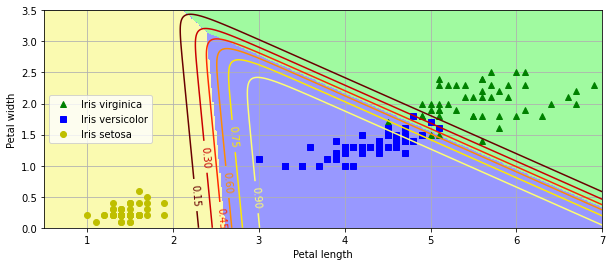

In [20]:

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
# save_fig("softmax_regression_contour_plot")
plt.show()

En este capítulo, ha aprendido varias formas de entrenar modelos lineales, tanto de regresión como de clasificación. Ha utilizado una ecuación de forma cerrada para resolver la regresión lineal, así como el descenso de gradiente, y ha aprendido cómo se pueden añadir varias penalizaciones a la función de coste durante el entrenamiento para regularizar el modelo. Por el camino, también aprendió a trazar curvas de aprendizaje y a analizarlas, así como a implementar la parada temprana. Finalmente, aprendiste cómo funcionan la regresión logística y la regresión softmax. Hemos abierto las primeras cajas negras del aprendizaje automático. En los próximos capítulos abriremos muchas más, empezando por las máquinas de vectores soporte.